# Table of Contents
### 1. Importing Libraries
### 2. Importing Data
### 3. Reviewing Data
### 4. Exploring Relationships
    *Correlation Matrix heatmap
    *Scatterplot
    *Pair Plot
    *Categorical Plot
    *Sampling the dataset

## 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# ensures the charts created aredisplayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## 2. Importing Data

In [4]:
#define path
path = r'/Users/lianabulte/Career Foundry/2023 Boat Sales Analysis'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_boat_data_v3.csv'))

## 3. Reviewing Data

In [6]:
df.shape

(8404, 15)

In [7]:
df.head()

,Unnamed: 0,Manufacturer,Year Built,Length,Width,Material,Views from last 7 days,Orig Currency,Orig Price,Country,City,Price in Euros,Boat Class,Boat Status,Boat Fuel Type
0,0,Rigiflex power boats,2017,4.00,1.90,Not Disclosed,226,CHF,3337,Switzerland,Lake Geneva,3403.74,Motor Yacht,new boat from stock,Not Disclosed
1,1,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,EUR,3490,Germany,Bnningstedt,3490.00,Center console boat,new boat from stock,Not Disclosed
2,2,Pioner power boats,2020,3.00,1.00,Not Disclosed,64,DKK,25900,Denmark,Svendborg,3367.00,Sport Boat,new boat from stock,Not Disclosed
3,3,Linder power boats,2019,3.55,1.46,Aluminium,58,EUR,3399,Germany,Bayern,3399.00,Fishing Boat,new boat from stock,Not Disclosed
4,4,Not Disclosed,1999,6.20,2.38,Aluminium,474,CHF,3600,Switzerland,Neuenburgersee,3672.00,Catamaran,Used boat,Unleaded


In [8]:
df.dtypes

Unnamed: 0                  int64
Manufacturer               object
Year Built                  int64
Length                    float64
Width                     float64
Material                   object
Views from last 7 days      int64
Orig Currency              object
Orig Price                  int64
Country                    object
City                       object
Price in Euros            float64
Boat Class                 object
Boat Status                object
Boat Fuel Type             object
dtype: object

In [9]:
# Check for missing values
df.isnull().sum() # No missing values!

Unnamed: 0                0
Manufacturer              0
Year Built                0
Length                    0
Width                     0
Material                  0
Views from last 7 days    0
Orig Currency             0
Orig Price                0
Country                   0
City                      0
Price in Euros            0
Boat Class                0
Boat Status               0
Boat Fuel Type            0
dtype: int64

## 4. Exploring Relationships

In [15]:
# Create a subset of variable to do analysis on 
sub = df[['Length', 'Width', 'Views from last 7 days', 'Price in Euros']]

In [16]:
sub

,Length,Width,Views from last 7 days,Price in Euros
0,4.00,1.90,226,3403.74
1,4.00,1.50,75,3490.00
2,3.00,1.00,64,3367.00
3,3.55,1.46,58,3399.00
4,6.20,2.38,474,3672.00
...,...,...,...,...
8399,6.00,1.62,288,5049.00
8400,6.30,2.44,1116,4998.00
8401,4.40,1.80,354,4499.00
8402,4.37,1.89,266,4300.00


### Correlation Matrix Heatmap

In [17]:
# Create a correlation matrix using pandas
sub.corr()

,Length,Width,Views from last 7 days,Price in Euros
Length,1.000000,0.853530,-0.131643,0.530171
Width,0.853530,1.000000,-0.155251,0.487699
Views from last 7 days,-0.131643,-0.155251,1.000000,-0.001855
Price in Euros,0.530171,0.487699,-0.001855,1.000000


The above table indicates that there is: 
 - a strong correlation between the length and width of a boat, 
 - a some what strong correlation between a boats length/width and its price, 
 - there is no relationship between the price of a boat and the amount of views that is has received
 - also there is a very weak (negative realtionship) between the boats dimensions and the views it has received 

This sparks an intial hypothesis that when interested buyers are viewing an add for a boat, they care to search for other characteristics first (such as the status, or class of the boat) rather than the price first

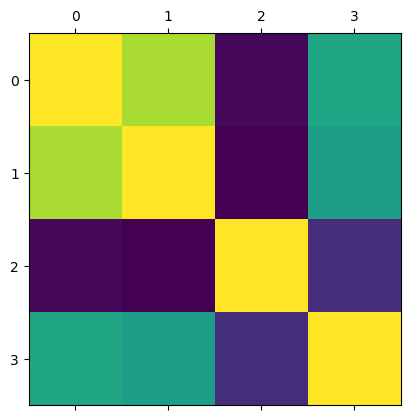

In [18]:
#creating a correlation heatmap with matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

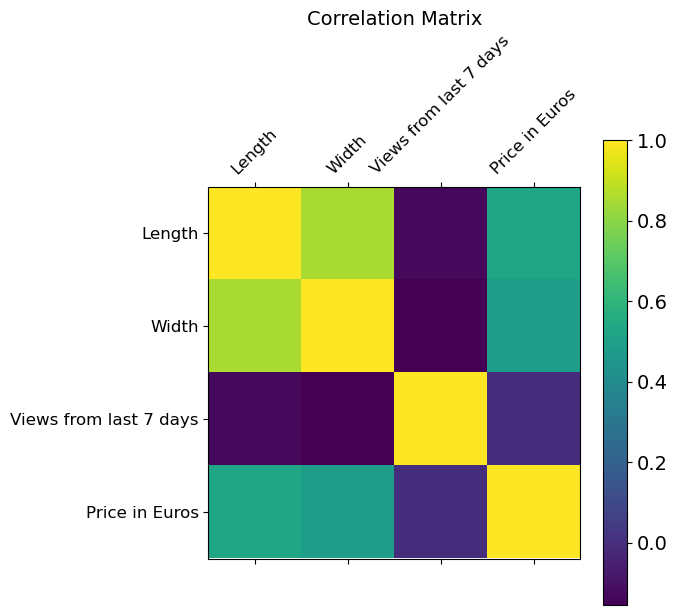

In [21]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

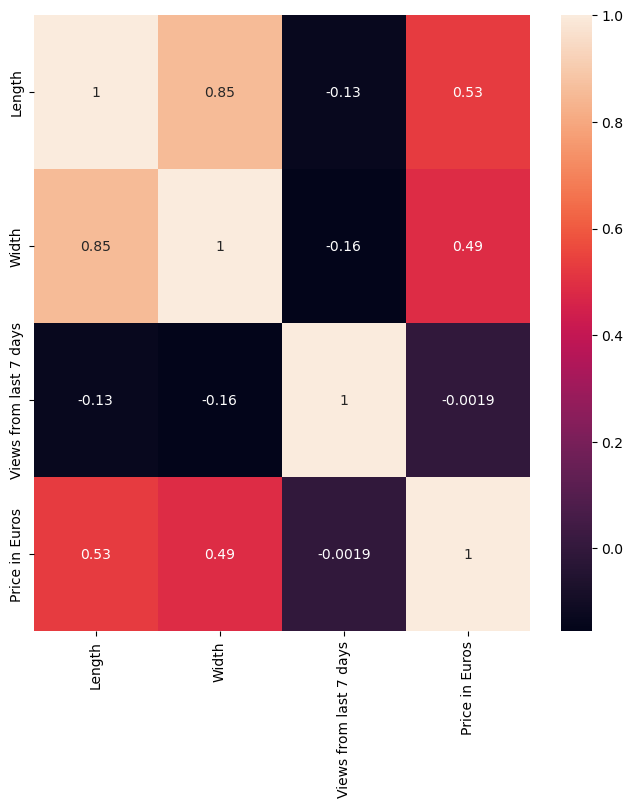

In [22]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [26]:
#saving the plot
heatmap_fig = corr.get_figure()
heatmap_fig.savefig('boat_heatmap.png')

In [27]:
#current dir
cwd = os.getcwd()
cwd

'/Users/lianabulte/Career Foundry/2023 Boat Sales Analysis/03 Scripts'

### Scatterplot

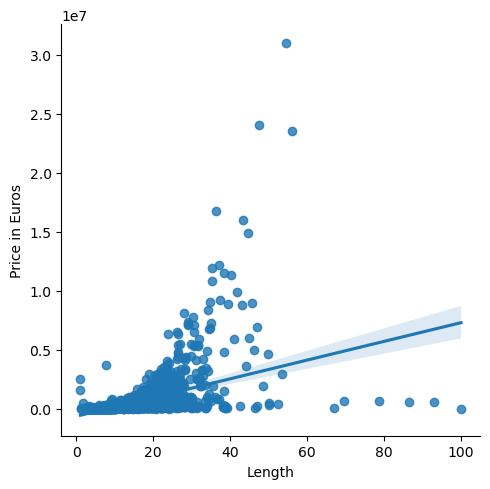

In [28]:
# Creating a scatterplot for the "length" and "Price in Euros" columns in seaborn

sns.lmplot(x = 'Length', y = 'Price in Euros', data = df)

The scatterplot indicates that up until the 30 meter mark the correlation is quite strong with price increasing with the boats length. However after this point there are various outliers that are affecting the correlations strength.
- For example, the 6 longest boats have a very low cost. Does this mean that they are very old and maybe in  bad shape which is why they are pricing it so low? Further analysis into the age and the type of the boat would be required
- Similar to the inverse, there are a 6 boats that are in the 40-60 meter range that are extremely high. Does this mean that that they are made out of a higher quality material, or are they newer models?


I chose to omit doing a scatterplot on width vs length as it is somewhat obvious that as a boat gets longer that it would also increase in width

### Pair Plot

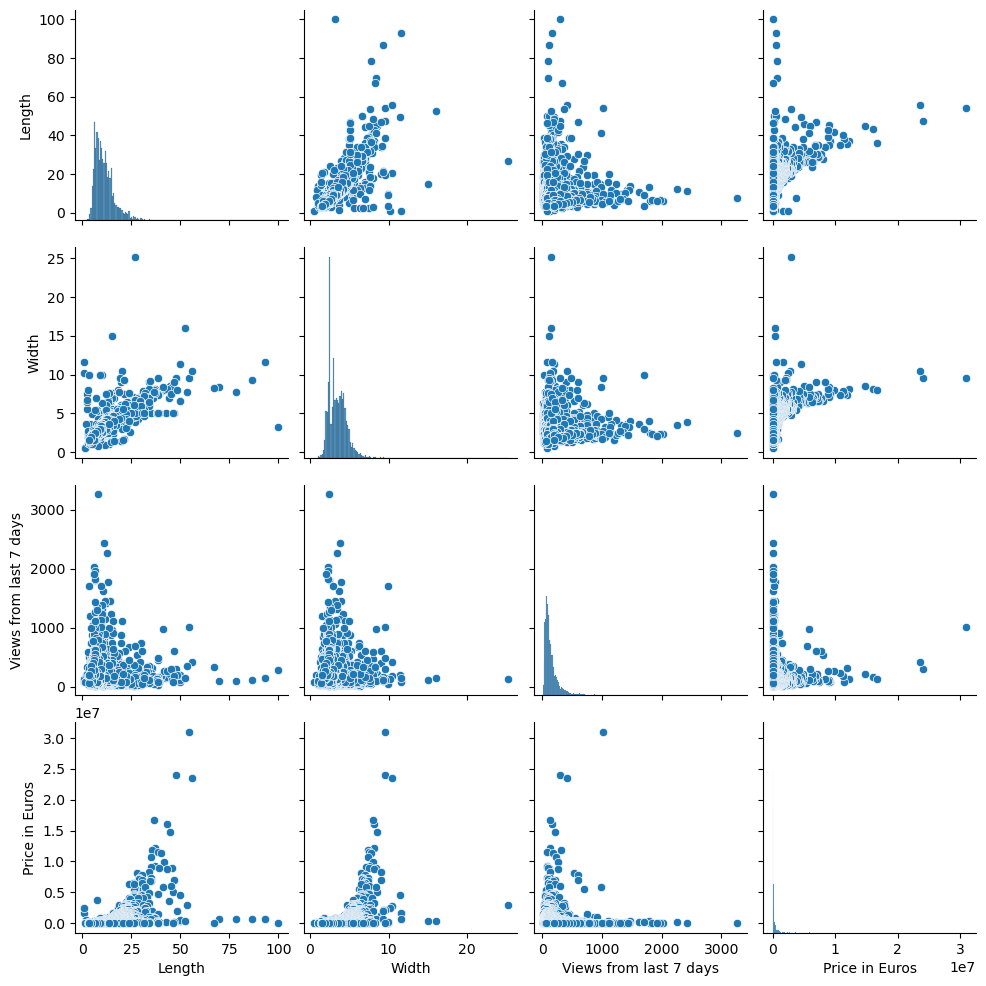

In [29]:
# Creating a pair plot of the subset

g = sns.pairplot(sub)

- Views from the last 7 days vs price in euros - The distribution here is showing that there is a concentration around ads that have been viewed less that 1,000 times and boats that at under 1 million euros, i would like to investigate that distribution 
- Length vs price in Euros - The distribution that was already identified in the scatterplot makes me interested in seeing how the distribution would look if i were to add a qualitative characteristic to this plot, such as the condition of the boat

I think the condition of the boat is an important variable for both and will explore this in future visualizations

### Categorical Plot

As mentioned in the above section, I hypothesize that the categorical characteristics of a boat are much higher drivers in the correlation in price and viewership of an ad. For now i will use the division of price to analyze

<AxesSubplot:xlabel='Price in Euros', ylabel='Count'>

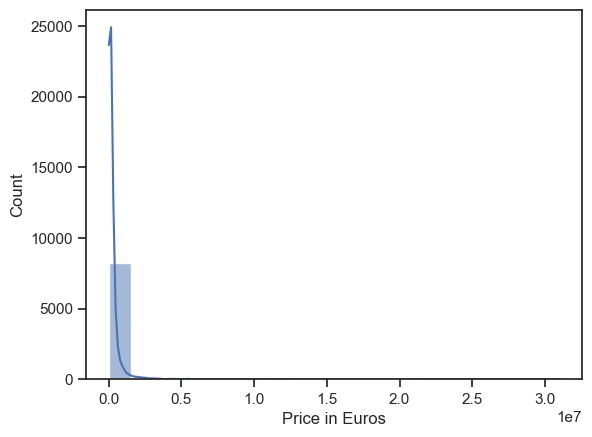

In [31]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" add a line that encompasses the distribution
sns.histplot(df['Price in Euros'], bins = 20, kde = True)

<AxesSubplot:xlabel='Price in Euros', ylabel='Count'>

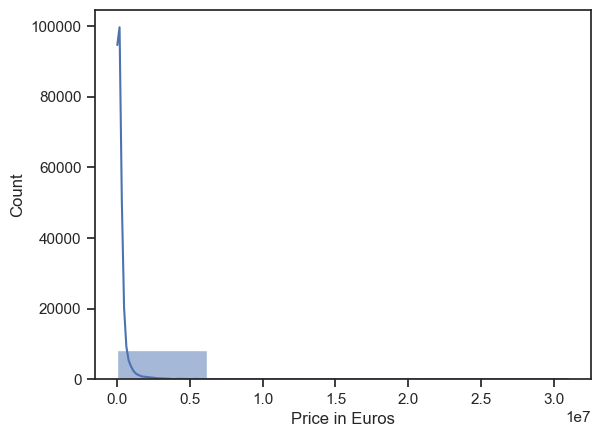

In [33]:
sns.histplot(df['Price in Euros'], bins = 5, kde = True)

It is hard to identify the buckets to create a price category , i will use the statistis in order to get a better visibility

In [36]:
df['Price in Euros'].describe()

count    8.404000e+03
mean     2.630457e+05
std      8.640070e+05
min      3.300000e+03
25%      4.287525e+04
50%      8.900000e+04
75%      2.225660e+05
max      3.100000e+07
Name: Price in Euros, dtype: float64

In [37]:
df.loc[df['Price in Euros'] < 42875.25, 'Price category'] = 'Low price'

In [38]:
df.loc[(df['Price in Euros'] >= 42875.25) & (df['Price in Euros'] < 222566.00), 'Price category'] = 'Middle price'

In [39]:
df.loc[df['Price in Euros'] >= 222566.00, 'Price category'] = 'High price'

In [40]:
df['Price category'].value_counts(dropna = False)

Middle price    4202
Low price       2101
High price      2101
Name: Price category, dtype: int64

KeyboardInterrupt: 

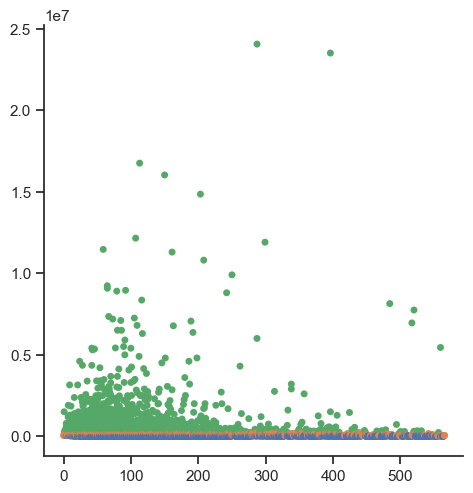

In [41]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Views from last 7 days", y="Price in Euros", hue="Price category", data=df)

The categorical plot was not able to load and was taking too long must create a sample dataset to have the plot work

### Sampling the dataset

In [42]:
#sampling data
np.random.seed(4)

In [43]:
dev = np.random.rand(len(df)) <= 0.7

In [44]:
dev

array([False,  True, False, ..., False, False, False])

In [45]:
big = df[dev]

In [47]:
small= df[~dev]

In [48]:
#Checking if the two split dataframes match the total when added
len(big)+len(small)

8404

In [49]:
# reducing the df only to the charts that matter for the plots, so that it can be more efficient
df_2 = small[['Views from last 7 days', 'Price in Euros']]

In [52]:
#recreating the loc for the small df
df_2.loc[df_2['Price in Euros'] < 42875.25, 'Price category'] = 'Low price'
df_2.loc[(df_2['Price in Euros'] >= 42875.25) & (df_2['Price in Euros'] < 222566.00), 'Price category'] = 'Middle price'
df_2.loc[df_2['Price in Euros'] >= 222566.00, 'Price category'] = 'High price'

/var/folders/p9/51wwwf417675ry0nsks67xhm0000gn/T/ipykernel_85359/1109350063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['Price in Euros'] < 42875.25, 'Price category'] = 'Low price'


In [53]:
df_2['Price category'].value_counts(dropna = False)

Middle price    1258
High price       634
Low price        624
Name: Price category, dtype: int64

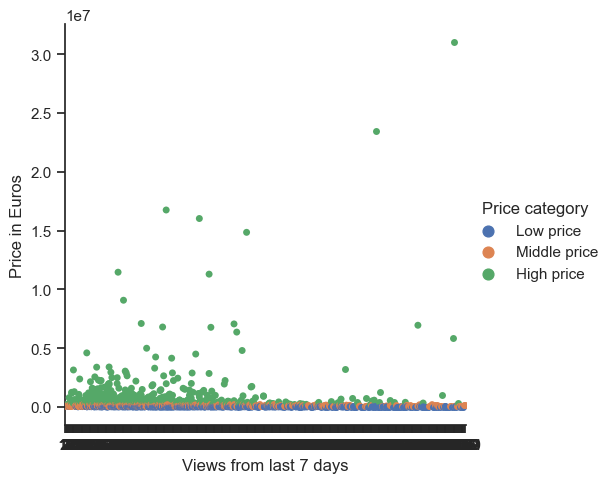

In [54]:
sns.set(style="ticks")
g = sns.catplot(x="Views from last 7 days", y="Price in Euros", hue="Price category", data=df_2)

In [55]:
# fig = g.get_figure()
g.savefig("categorical_plot.png")

The above graph reiterates that the price of the boat is not a driving factor for a buyer to look at the ad as all price categories have varying ad hits. Which leads me to believe that one of the qualitative characteristics will have a stronger corelation to the viewing of an ad.

#### Question #7 


The questions I posed in my initial project report weren't answered with these plots as they depended on the other qualitative variables in the dataset. Like reviewing total by country and the condition of the boat. Below are additional questions to investigate based on this exercise's analysis
- What are the driving/common characteristics for an ad with the top 25% most views?
- What qualitative variable drives the price of a boat the most?

#### Question #8

Potential hypothesis: 
- The popularity of a boat ad is based on a qualitative variable
- The price of a boat will decrease the older it is

Futher analysis is required on the qualitative variables 